<a href="https://colab.research.google.com/github/YuliiaHudz/Python-Case-Studies/blob/main/Data_Visualization_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script continues analyzing the **sales dataset (`sales.csv`)** with a focus on **profit (`profit`) visualization** using histograms, bar charts, and line graphs. The goal is to explore profit distribution, trends, and differences across categories, devices, and customer demographics.  

### **Key Steps in the Script:**  

✅ **Histogram of Profit**:  
- Visualizes the overall distribution of `profit` values.  
- Helps identify the most common profit ranges and overall distribution characteristics.  

✅ **Histograms by Device Type (`device_type`)**:  
- Compares profit distribution for **web browser vs. mobile app** sales.  
- Uses `hue` (to overlay both distributions) and `col` (to separate them into different plots).  

✅ **Line Chart of Profit Over Time (`order_date`)**:  
- Shows **profit trends over time** to detect patterns and fluctuations.  
- Ensures `order_date` is in the correct date format before plotting.  

✅ **Bar Chart of Profit by Product Category (`product_category`)**:  
- Displays total profit per category.  
- Identifies the **most and least profitable product categories**.  

✅ **Bar Chart of Profit by Category & Gender (`gender`)**:  
- Uses `hue` to compare **male vs. female customer purchases**.  
- Analyzes behavioral differences between customer groups.  

### **Insights and Takeaways:**  
This task helps uncover:  
- Which products generate the highest/lowest profits.  
- How profit trends change over time.  
- Whether mobile app or browser users are more profitable.  
- Differences in purchasing behavior between male and female customers.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to Google Drive (works in Google Colab)
from google.colab import drive
drive.mount("/content/drive")

# Changing the working directory to the folder containing the CSV files
%cd /content/drive/MyDrive/Mate_Homework/

# Loading the CSV files
sales_data = pd.read_csv("sales_data.csv")

sales_data.head()

Mounted at /content/drive
/content/drive/MyDrive/Mate_Homework


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


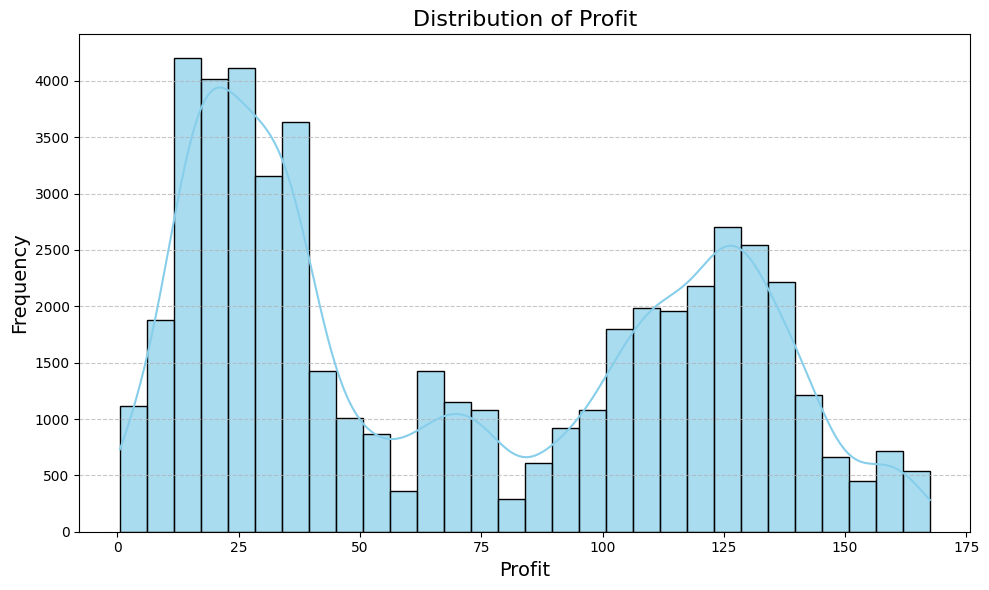

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sales_data["Profit"], bins=30, kde=True, color="skyblue", edgecolor="black", alpha=0.7)

# Adding titles and labels
plt.title("Distribution of Profit", fontsize=16)
plt.xlabel("Profit", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Display the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The distribution of profit appears to be right-skewed, with a long tail towards higher profit values. This suggests that a majority of the observations fall within the lower to middle range of profit values, while a smaller proportion of observations contribute to the higher end of the distribution. The peak of the distribution lies around the 25 profit mark, indicating that this is the most frequent profit value.

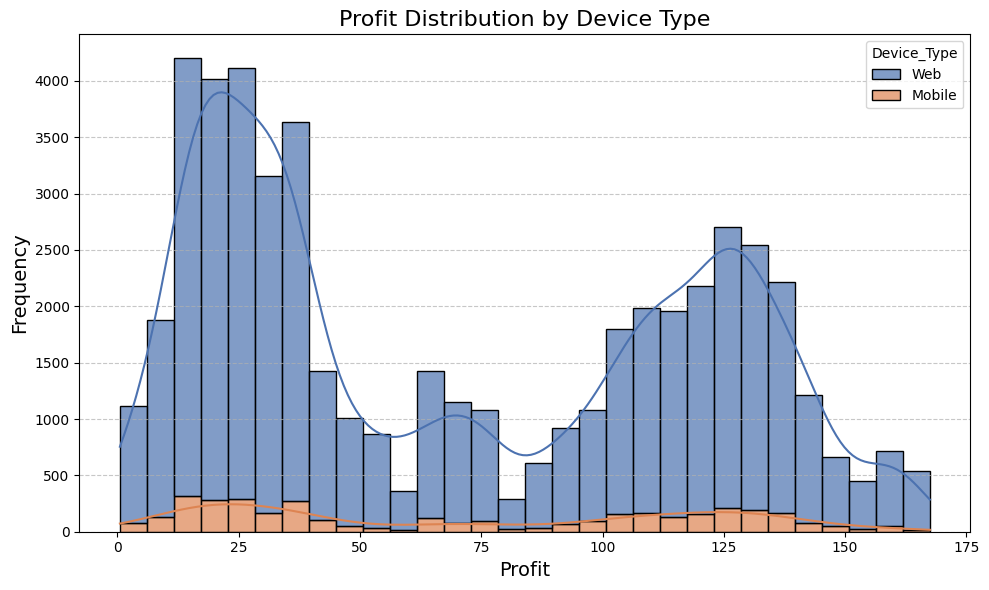

In [ ]:
# Plotting histograms with 'hue' to differentiate device types
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_data, x="Profit", hue="Device_Type", bins=30, kde=True, multiple="stack", palette="deep", edgecolor="black", alpha=0.7)

# Adding titles and labels
plt.title("Profit Distribution by Device Type", fontsize=16)
plt.xlabel("Profit", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Display the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

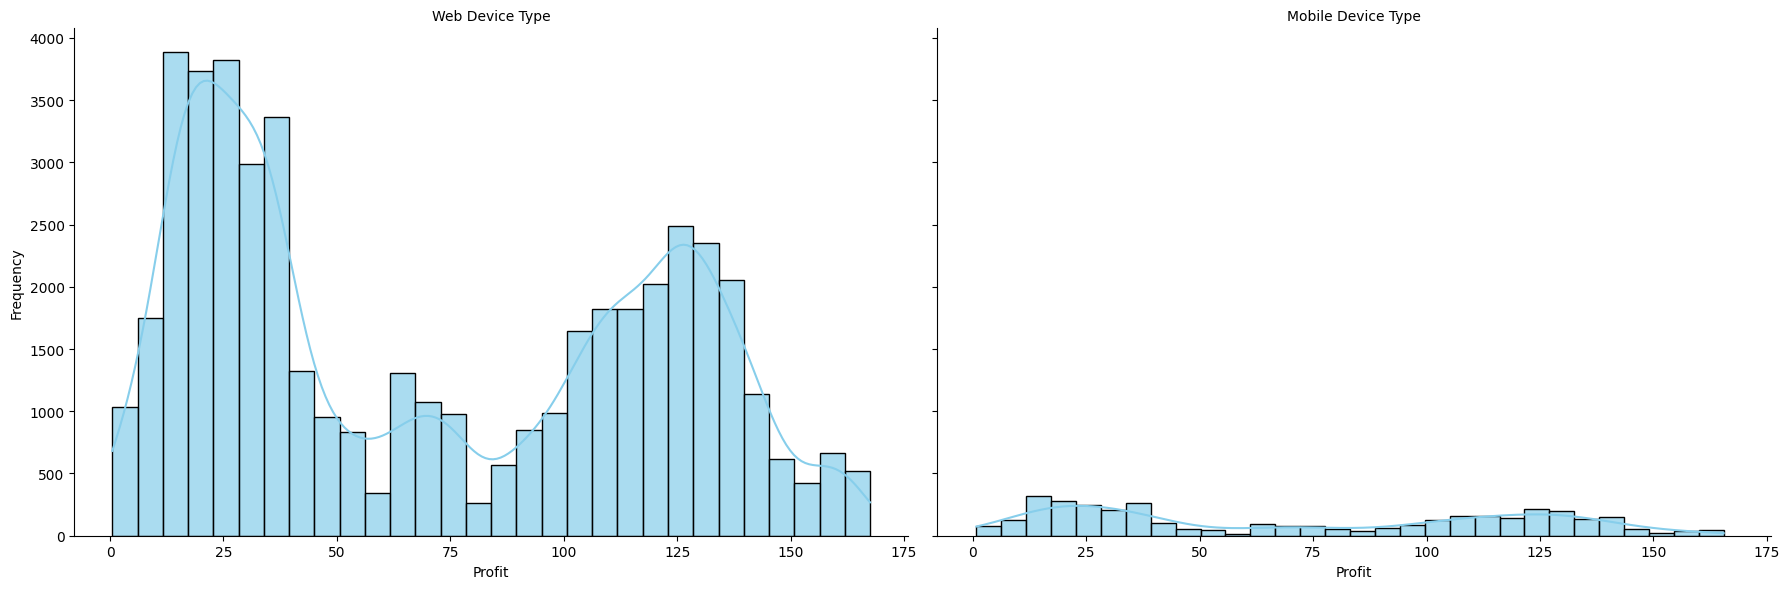

In [ ]:
# Creating separate histograms using 'col' for each device type
g = sns.FacetGrid(sales_data, col="Device_Type", height=6, aspect=1.5, palette="deep")
g.map(sns.histplot, "Profit", bins=30, kde=True, color="skyblue", edgecolor="black", alpha=0.7)

# Adding titles and labels
g.set_axis_labels("Profit", "Frequency")
g.set_titles("{col_name} Device Type")

# Display the plot
plt.tight_layout()
plt.show()

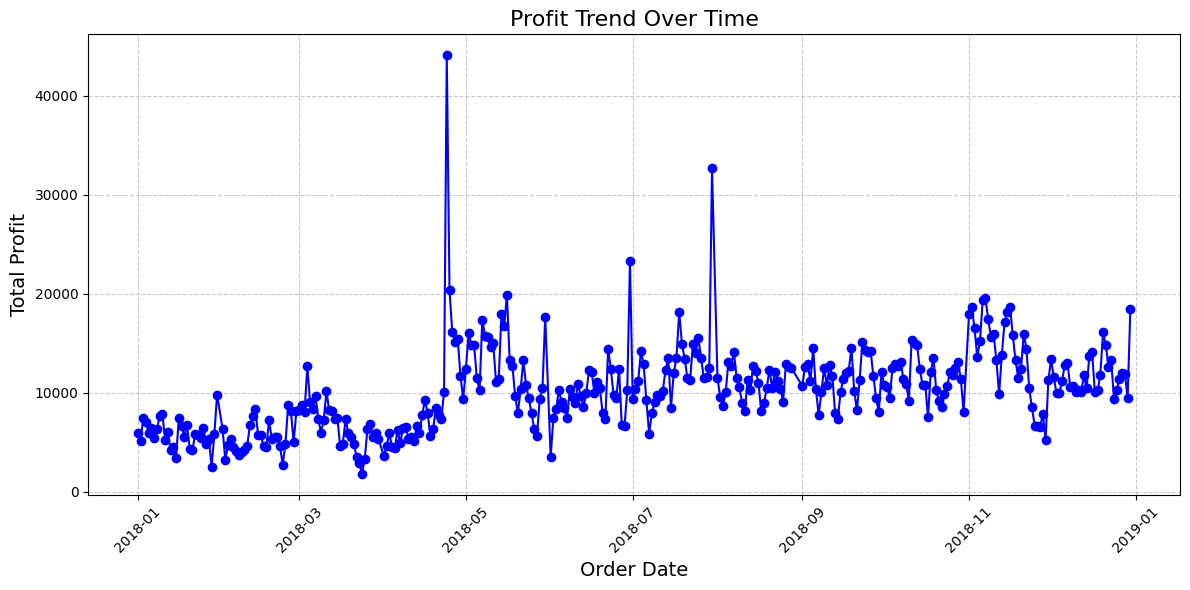

In [ ]:
# Ensure that 'Order_Date' is in datetime format
sales_data["Order_Date"] = pd.to_datetime(sales_data["Order_Date"], errors="coerce")

# Grouping the data by order date and calculating total profit for each day
daily_profit = sales_data.groupby("Order_Date")["Profit"].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_profit["Order_Date"], daily_profit["Profit"], marker="o", linestyle="-", color="b")

# Adding titles and labels
plt.title("Profit Trend Over Time", fontsize=16)
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Total Profit", fontsize=14)

# Display the grid
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust the x-axis to show readable date labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

The chart shows a significant variation in profit over time. There are several peaks throughout the year, indicating periods of high sales. However, there are also prolonged periods of lower profit, especially towards the end of the year. This suggests that sales may be influenced by seasonal factors or specific marketing campaigns. Overall, the trend is somewhat erratic, making it difficult to predict future sales with certainty. Further analysis, such as considering external factors like economic indicators or competitor activity, would be necessary to gain a more comprehensive understanding of the sales patterns.

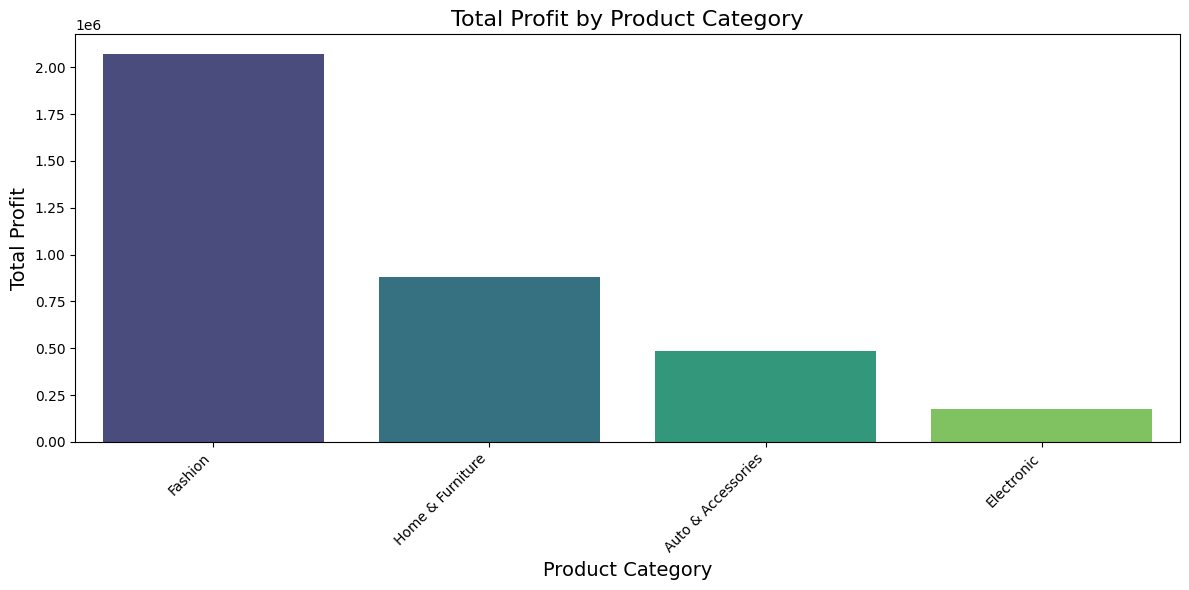

In [ ]:
# Grouping data by product category and calculating total profit for each category
category_profit = sales_data.groupby("Product_Category")["Profit"].sum().reset_index()

# Sorting the values by profit in descending order for better visualization
category_profit = category_profit.sort_values(by="Profit", ascending=False)

# Plotting the bar chart with 'hue' to prevent the warning
plt.figure(figsize=(12, 6))
sns.barplot(x="Product_Category", y="Profit", data=category_profit, hue="Product_Category", palette="viridis")

# Adding titles and labels
plt.title("Total Profit by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Total Profit", fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()

The chart shows the total profit for each product category. The Fashion category is the most profitable, generating over 2 million in profit. Home&Furniture is the second most profitable category, followed by Auto&Accessories. The Electronic category is the least profitable, generating the smallest amount of profit. This suggests that the company should focus on expanding its Fashion line and potentially explore ways to increase profitability in the Home&Furniture and Auto&Accessories categories.

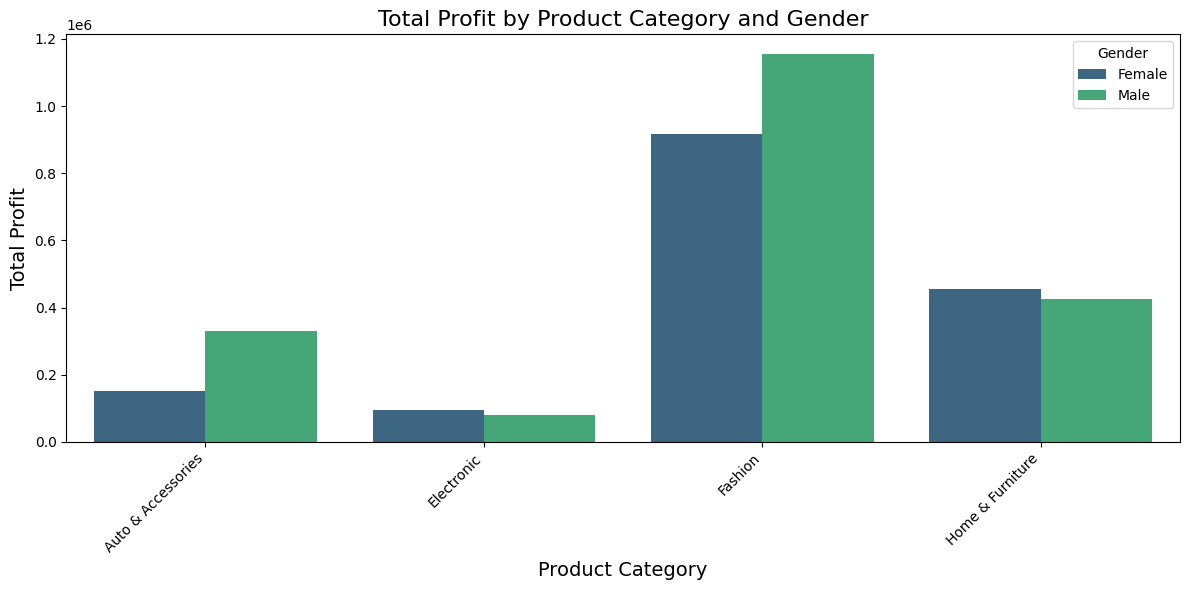

In [ ]:
# Grouping data by product category and gender, and calculating total profit for each group
category_gender_profit = sales_data.groupby(["Product_Category", "Gender"])["Profit"].sum().reset_index()

# Plotting the bar chart with hue for gender
plt.figure(figsize=(12, 6))
sns.barplot(x="Product_Category", y="Profit", data=category_gender_profit, hue="Gender", palette="viridis")

# Adding titles and labels
plt.title("Total Profit by Product Category and Gender", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Total Profit", fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()

The chart reveals distinct spending patterns between genders. Women are the primary drivers of revenue in the Fashion category, while men dominate spending in Auto&Accessories. Both genders contribute significantly to Home&Furniture purchases. Electronics sees relatively equal spending from both genders.